In [35]:
import numpy as np
import pandas as pd
# import io
import matplotlib.pyplot as plt

In [36]:
# Initialize the input vector and output vector for XOR
x=np.array([[0,0,1,1],[0,1,0,1]])
y=np.array([[0,1,1,0]]) 

In [37]:
#Initialize the structure of  MLP with input ,hidden  and output layer
# Network architecture
n_x = 2  
n_h = 2  
n_y = 1  
m = x.shape[1]
lr = 0.1



In [38]:
# Weight initialization
w1 = np.random.rand(n_h, n_x)
w2 = np.random.rand(n_y, n_h)

b1 = np.zeros((n_h,1))
b2 = np.zeros((n_y,1))



In [39]:
losses = []
def sigmoid(z):
    return 1/(1+np.exp(-z))
    

In [40]:
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2



In [41]:
def back_prop(m, w1, w2, a1, a2, x, y):

    dz2 = a2 - y
    dw2 = np.dot(dz2, a1.T) / m

    dz1 = np.dot(w2.T, dz2) * a1 * (1 - a1)
    dw1 = np.dot(dz1, x.T) / m

    return dw1, dw2

In [42]:
iterations = 10000
eps = 1e-8

for i in range(iterations):

    z1, a1, z2, a2 = forward_prop(w1, w2, x)

    loss = -(1/m)*np.sum(
        y*np.log(a2+eps) + (1-y)*np.log(1-a2+eps)
    )

    losses.append(loss)

    dw1, dw2 = back_prop(m, w1, w2, a1, a2, x, y)

    w1 -= lr * dw1
    w2 -= lr * dw2

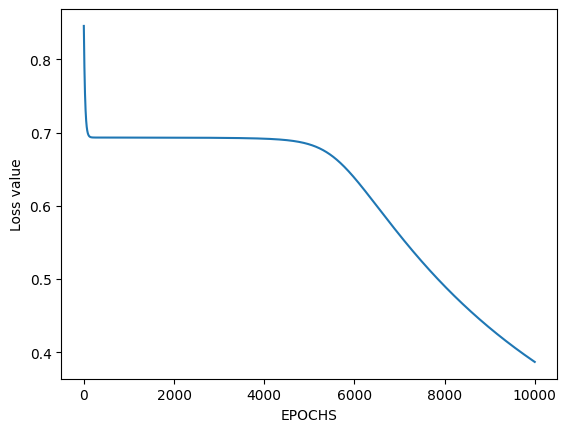

In [43]:
# plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

In [ ]:
def predict(w1, w2, inp):

    _,_,_,a2 = forward_prop(w1, w2, inp)

    output = int(np.squeeze(a2) >= 0.5)
    print(inp.T, "->", output)

In [48]:
print("Input    Output")

predict(w1,w2,np.array([[1],[0]]))
predict(w1,w2,np.array([[1],[1]]))
predict(w1,w2,np.array([[0],[1]]))
predict(w1,w2,np.array([[0],[0]]))

Input    Output
[[1 0]] -> 1
[[1 1]] -> 0
[[0 1]] -> 1
[[0 0]] -> 0
